# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
scc = pd.merge(study_results,mouse_metadata,on = ["Mouse ID"],how = "left")

#checks
# scc.info()

# Display the data table for preview
scc.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
scc["Mouse ID"].value_counts().count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
#Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
scc_groups=scc.groupby(["Mouse ID","Timepoint"])
mouse_counts=scc_groups.aggregate({"Mouse ID":"count"}).rename(columns ={"Mouse ID":"ID Counts"})
mouse_counts.reset_index(inplace = True)
mouse_counts.loc[mouse_counts["ID Counts"]>1,"Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
#Alternate method to get duplicates :
scc['Duplicates'] = scc.duplicated(subset=["Mouse ID","Timepoint"])
dupe_mouse = scc.loc[scc['Duplicates']==True,"Mouse ID"].unique()
dupe_mouse[0]

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
pd.options.display.max_rows =100
pd.options.display.max_columns =100
scc.pop("Duplicates")

scc_dupe = scc.loc[scc["Mouse ID"] == dupe_mouse[0],:]
scc_dupe.head(scc_dupe.shape[0])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
scc_clean = scc.loc[scc["Mouse ID"] != dupe_mouse[0],:]
scc_clean.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
scc_clean["Mouse ID"].value_counts().count()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
scc_regimen_groups = scc_clean.groupby(["Drug Regimen"])
tumor_volume = scc_regimen_groups["Tumor Volume (mm3)"]


mean_tm = tumor_volume.mean()
median_tm = tumor_volume.median()
var_tm = tumor_volume.var()
std_tm = tumor_volume.std()
sem_tm = tumor_volume.sem()


# Assemble the resulting series into a single summary DataFrame.
scc_regimen = pd.merge(mean_tm,median_tm, on = "Drug Regimen", how = "left")\
.rename(columns = ({"Tumor Volume (mm3)_x": "Mean Tumor Volume","Tumor Volume (mm3)_y": "Median Tumor Volume"}))\
.merge(var_tm, on = "Drug Regimen", how = "left")\
.rename(columns = ({"Tumor Volume (mm3)": "Tumor Volume Variance"}))\
.merge(std_tm, on = "Drug Regimen", how = "left")\
.rename(columns = ({"Tumor Volume (mm3)": "Tumor Volume Std. Dev."}))\
.merge(sem_tm, on = "Drug Regimen", how = "left")\
.rename(columns = ({"Tumor Volume (mm3)": "Tumor Volume Std. Err."}))
        

scc_regimen.head(scc_regimen.shape[0])

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
scc_regimen = scc_clean.groupby(["Drug Regimen"])\
.agg(Mean_Tumor_Volume=("Tumor Volume (mm3)","mean"),\
     Mediam_Tumor_Volume=("Tumor Volume (mm3)","median"),\
     Tumor_Volume_Variance=("Tumor Volume (mm3)","var"),\
     Tumor_Volume_Std_Dev=("Tumor Volume (mm3)","std"),\
     Tumor_Volume_Std_Err=("Tumor Volume (mm3)","sem"))

scc_regimen.head(scc_regimen.shape[0])

,Mean_Tumor_Volume,Mediam_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

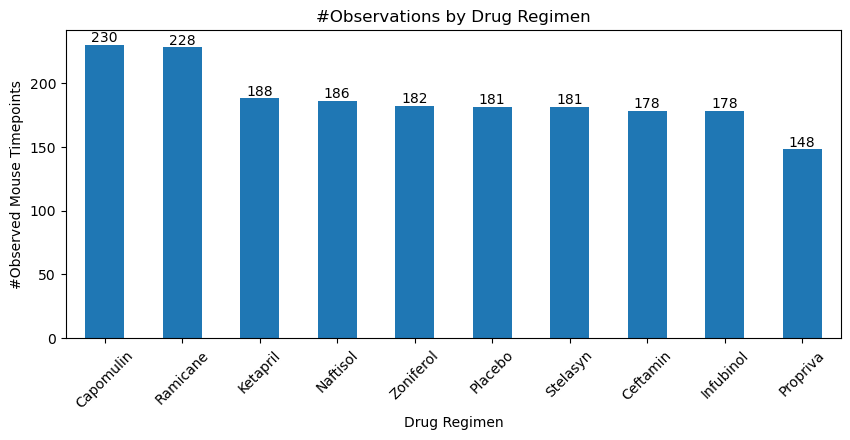

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
scc_regimen_rowcount=scc_regimen_groups.agg(row_count=("Mouse ID","count")).sort_values("row_count",ascending =False)
scc_regimen_plot=scc_regimen_rowcount.plot(kind="bar",title = "#Observations by Drug Regimen",xlabel= "Drug Regimen", ylabel="#Observed Mouse Timepoints",rot =45,legend=False,figsize=(10,4))
scc_regimen_rowcount.reset_index(inplace= True)

for container in scc_regimen_plot.containers:
    scc_regimen_plot.bar_label(container)


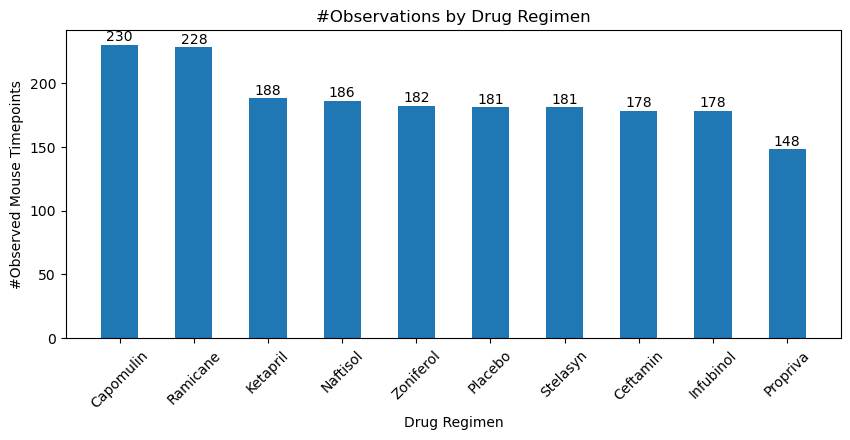

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,4))
drugs = scc_regimen_rowcount["Drug Regimen"]
observations = scc_regimen_rowcount["row_count"]

plt.bar(drugs, observations ,align="center",width=0.5,label=observations)

plt.title("#Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("#Observed Mouse Timepoints")
for i in range(len(drugs)):
    plt.text(i,observations[i]+3,s=observations[i],ha="center")

xaxis=np.arange(len(drugs))
xticks = [x for x in  xaxis]
xtick_labels = drugs
plt.xticks(ticks = xticks ,labels = xtick_labels,rotation = 45) 


plt.show()

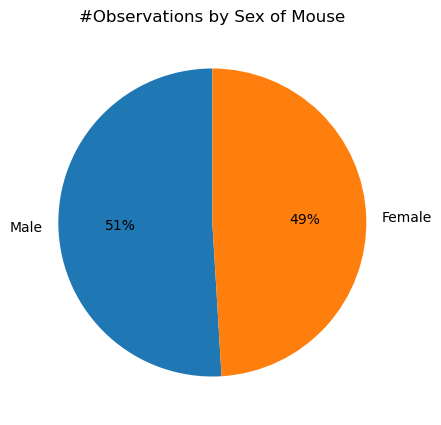

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
scc_sex_rowcount = scc_clean.groupby(["Sex"]).agg(row_count=("Mouse ID","count")).sort_values("row_count",ascending =False)
scc_sex_rowcount.plot.pie(x="Sex",y ="row_count",autopct="%1.0f%%",legend = False, ylabel = "",title = "#Observations by Sex of Mouse", startangle = 90,figsize=(5,5))
scc_sex_rowcount.reset_index(inplace= True)

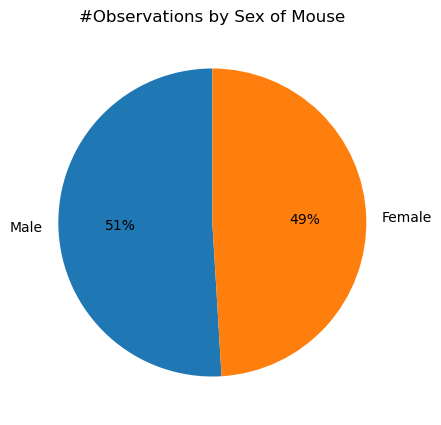

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(scc_sex_rowcount["row_count"],labels = scc_sex_rowcount["Sex"].unique(),startangle=90,autopct="%1.0f%%")

plt.title("#Observations by Sex of Mouse")
plt.xlabel("")
plt.ylabel("")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
scc_updated= pd.DataFrame(scc_clean.query('`Drug Regimen` == ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]'))

scc_updated["Last Timepoint"] = scc_updated.groupby(["Mouse ID"])["Timepoint"].transform(max)
    
scc_mouse_final_tv_only=scc_updated.loc[scc_updated["Timepoint"]==scc_updated["Last Timepoint"],["Mouse ID","Tumor Volume (mm3)"]]\
.rename(columns=({"Tumor Volume (mm3)":"Final Tumor Volume"}))

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
scc_mouse_final_tv=scc_updated.merge(scc_mouse_final_tv_only, on = "Mouse ID", how = "left").sort_values(["Mouse ID","Timepoint"]).reset_index(drop=True)
scc_mouse_final_tv.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint,Final Tumor Volume
0,a203,0,45.000000,0,Infubinol,Female,20,23,45,67.973419
1,a203,5,48.508468,0,Infubinol,Female,20,23,45,67.973419
2,a203,10,51.852437,1,Infubinol,Female,20,23,45,67.973419
3,a203,15,52.777870,1,Infubinol,Female,20,23,45,67.973419
4,a203,20,55.173336,1,Infubinol,Female,20,23,45,67.973419


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for i,drug in enumerate(treatments):
    tumor_volume.append(scc_mouse_final_tv.loc[(scc_mouse_final_tv["Drug Regimen"]==drug) & (scc_mouse_final_tv["Timepoint"]==scc_mouse_final_tv["Last Timepoint"]),"Final Tumor Volume"])
    percentiles = tumor_volume[i].quantile([0.25,0.5,0.75])
    upperq = percentiles[0.75]
    lowerq = percentiles[0.25]
    IQR = upperq-lowerq
    upper_lim = upperq+(1.5*IQR)
    lower_lim = lowerq-(1.5*IQR)
    outliers = [tv for tv in tumor_volume[i] if (tv<lower_lim) | (tv>upper_lim)]
    print(f"{(drug)}'s:\nPotential outliers are :{outliers} \nInterquartile Range is :{round(IQR,2)} ")

Capomulin's:
Potential outliers are :[] 
Interquartile Range is :7.78 
Ramicane's:
Potential outliers are :[] 
Interquartile Range is :9.1 
Infubinol's:
Potential outliers are :[36.3213458] 
Interquartile Range is :11.48 
Ceftamin's:
Potential outliers are :[] 
Interquartile Range is :15.58 


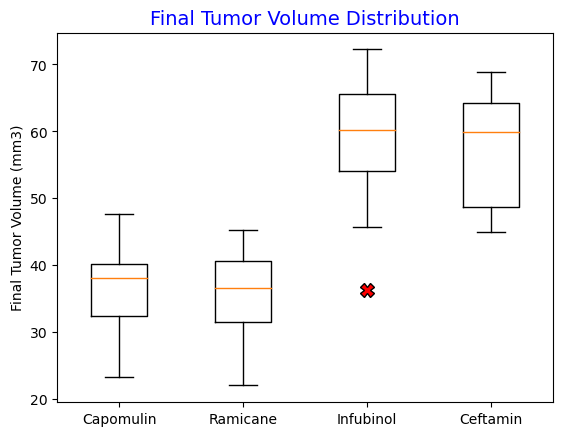

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# scc_box_plot = scc_mouse_final_tv.query('`Drug Regimen` == treatments & `Timepoint` == `Last Timepoint`')["Drug Regimen","Final Tumor Volume"]
plt.boxplot(tumor_volume,0,flierprops={'marker': 'X', 'markersize': 10, 'markerfacecolor': 'r','markeredgecolor':'k','linewidth':'1'})

font = {'color':  'blue','fontweight': '3','fontsize': 14}    
plt.title("Final Tumor Volume Distribution",fontdict=font)       
 
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([int(i+1) for i in range(len(treatments))],labels = treatments)
plt.show()

## Line and Scatter Plots

Enter Mouse ID: l509


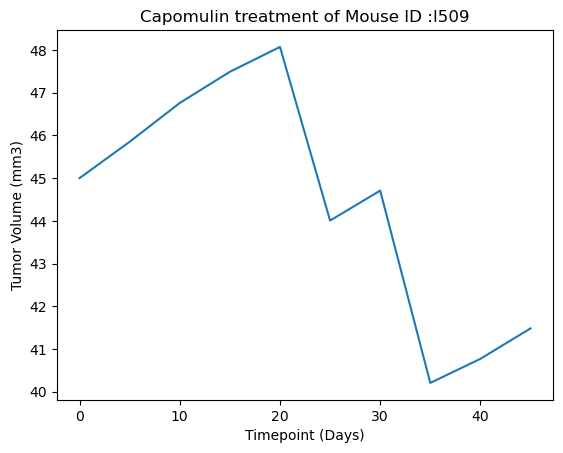

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
m = str(input("Enter Mouse ID:"))

if m in scc_mouse_final_tv.loc[(scc_mouse_final_tv["Drug Regimen"]=="Capomulin" )]["Mouse ID"].values.tolist():
    
    scc_mouse_trend = scc_mouse_final_tv.loc[(scc_mouse_final_tv["Drug Regimen"]=="Capomulin" ) & (scc_mouse_final_tv["Mouse ID"]==m),["Timepoint","Tumor Volume (mm3)"]].reset_index(drop=True).sort_values("Timepoint")
    scc_mouse_trend.plot(kind="line",x= "Timepoint",title=f"Capomulin treatment of Mouse ID :{m}",legend = False, xlabel = "Timepoint (Days)", ylabel = "Tumor Volume (mm3)")   
    
else:
    m = print("Please re-run and enter a valid Mouse ID")

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

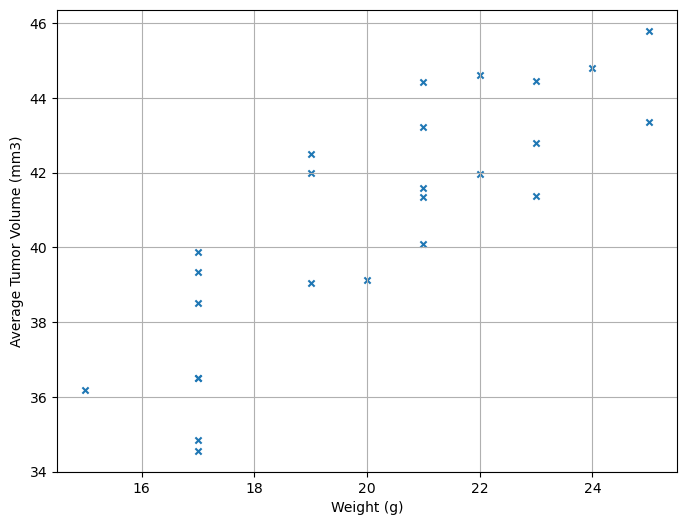

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scc_capomulin_scatter = scc_mouse_final_tv.loc[(scc_mouse_final_tv["Drug Regimen"]=="Capomulin" ),:]\
.groupby(["Drug Regimen","Mouse ID","Weight (g)"])\
.agg(Average_Tumor_Volume = ("Tumor Volume (mm3)", "mean")).reset_index(drop=False)\
.sort_values(["Weight (g)","Average_Tumor_Volume"])

scc_capomulin_scatter.plot(kind="scatter",x= "Weight (g)", y = "Average_Tumor_Volume",marker ="x",grid=True, figsize=(8,6),xlabel = "Weight (g)", ylabel = "Average Tumor Volume (mm3)")


## Correlation and Regression

The R-Squared Value is: 0.84


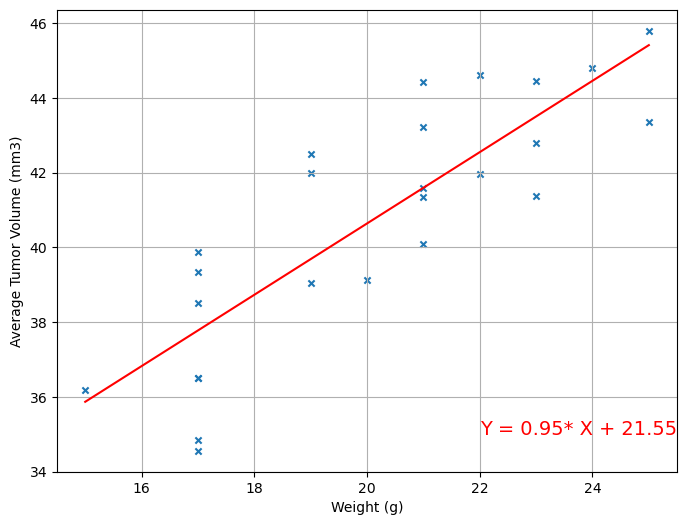

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
scc_capomulin_scatter.plot(kind="scatter",x= "Weight (g)", y = "Average_Tumor_Volume",marker ="x",grid=True, figsize=(8,6),xlabel = "Weight (g)", ylabel = "Average Tumor Volume (mm3)")

Average_Tumor_Volume = scc_capomulin_scatter["Average_Tumor_Volume"]
Weight =  scc_capomulin_scatter["Weight (g)"]

(slope, intercept, r, p, std_e) = st.linregress(Weight,Average_Tumor_Volume)
regress_line = slope * Weight + intercept
regress_eq = "Y = " + str(round(slope,2))+ "* X + " + str(round(intercept,2))

plt.plot(Weight,regress_line,color = "r")
plt.annotate(regress_eq,(22,35),color="red",fontsize=14)
print(f"The R-Squared Value is: {round(r,2)}")
